## Previsão de Notas do IMDB

##### Este projeto realiza uma análise preditiva a partir de um banco de dados cinematográficos para orientação sobre que tipo de filme deve ser o próximo a ser produzido. Prevê as notas do IMDB para filmes com base em várias características.

In [83]:
# necessário a instalação dos seguintes pacotes para esse execução desse notebook:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install nltk
# !pip install stopwords

In [84]:
!pip install numpy

In [85]:
!pip install pandas

In [86]:
!pip install matplotlib

In [87]:
!pip install seaborn

### Teste de visualização dos dados

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carregando o arquivo CSV para análise
file_path = 'C:/Indicium/imdb.csv'
data = pd.read_csv(file_path)

# mostrando as primeiras linhas do dataframe
print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

## Análise Exploratória dos Dados (EDA)

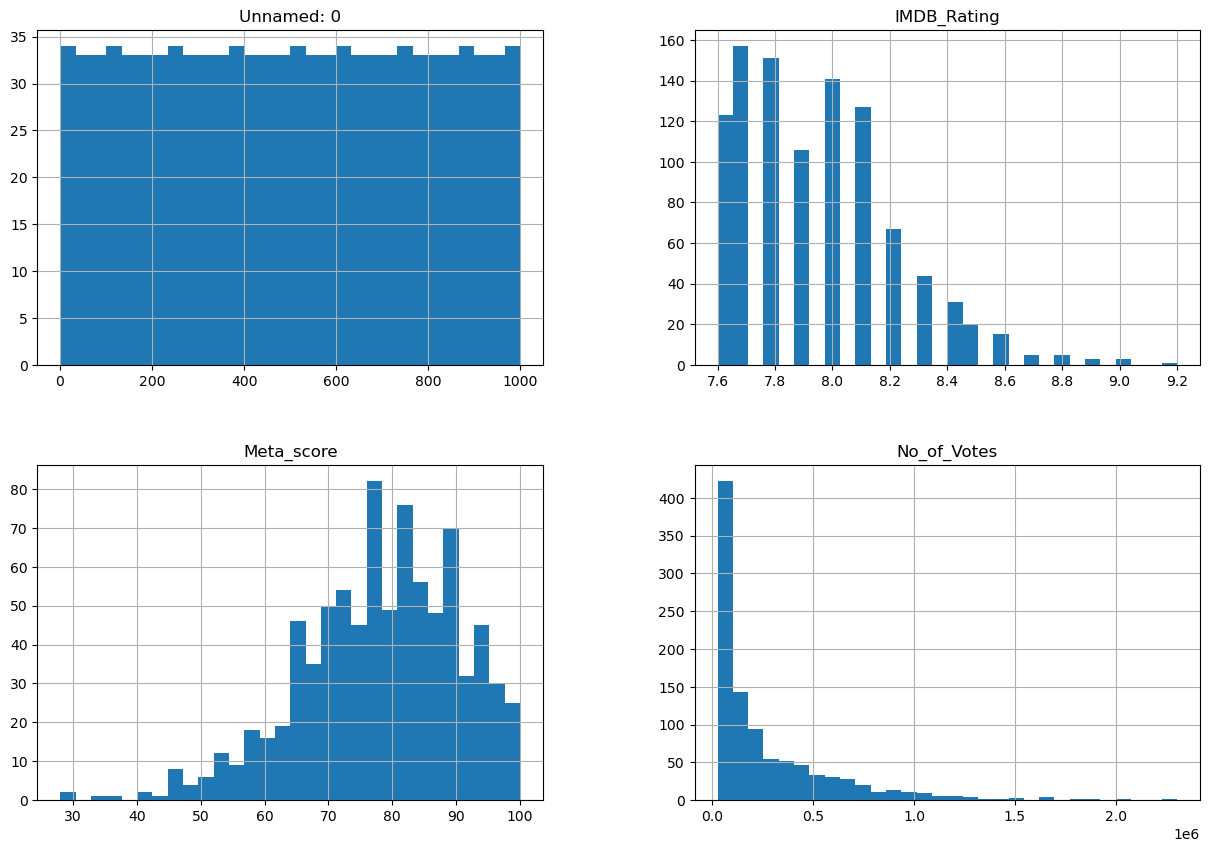

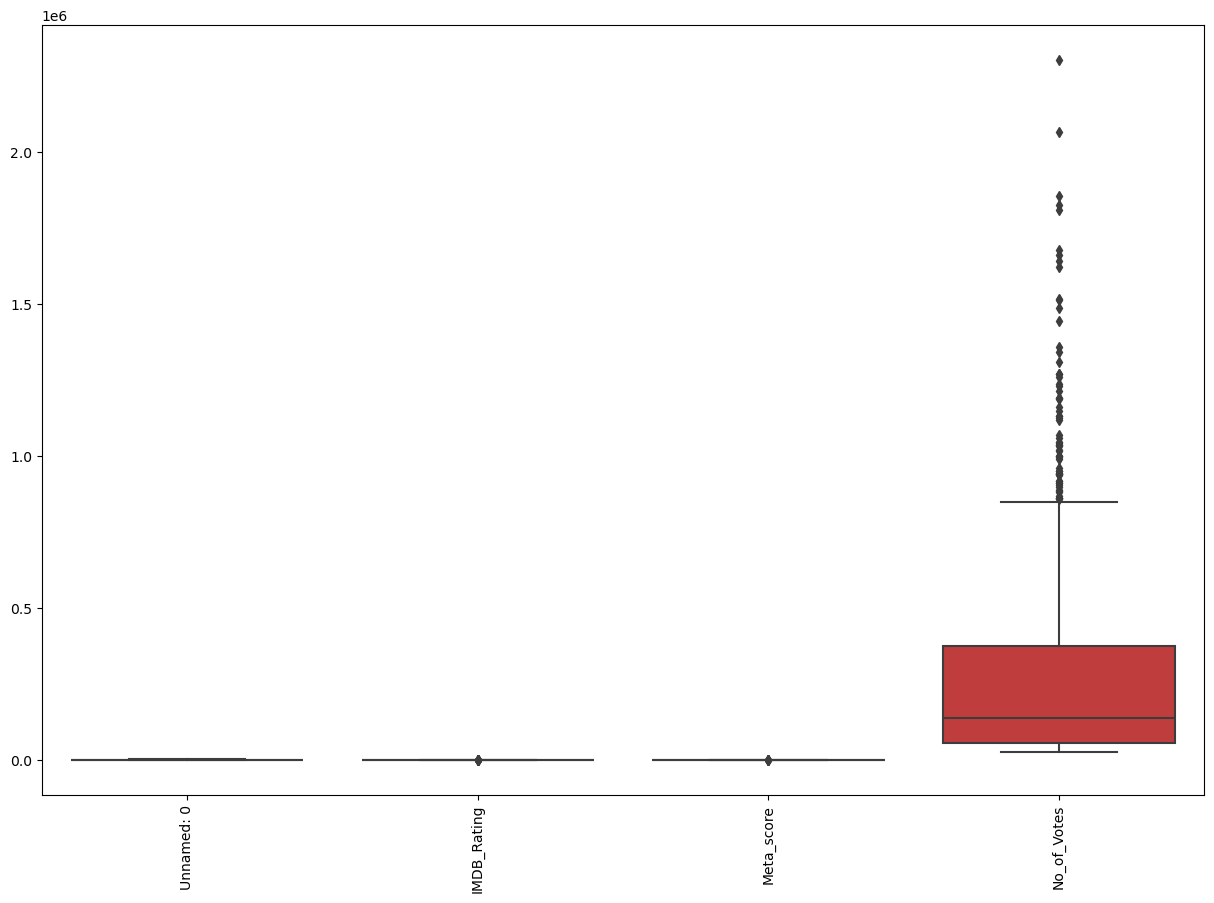

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carregando o arquivo CSV
file_path = 'C:/Indicium/imdb.csv'
data = pd.read_csv(file_path)

# histogramas para variáveis numéricas
data.hist(bins=30, figsize=(15, 10))
plt.show()

# boxplots para variáveis numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

##### A partir da análise inicial através de histogramas e boxplots para variáveis numéricas, é possível observar que as variáveis "Nota do IMDB" (IMDB_Rating), seguido de "Média ponderada de todas as críticas" (Meta_score) e depois, "Número de votos" (No_of_Votes), são as que melhor demonstram o que é importante se considerar nesse tipo de análise. O produtor do próximo filme pode tomar suas decisões baseando-se nessas análises, para que seja considerado por ele e por toda sua equipe, principalmente a avaliação sobre o filme, ou gênero, ou diretor, etc. A avaliação, ou seja, "Número de votos" (conforme boxplot acima) é a variável numérica de maior peso ou grau de importância para tomada de decisão nesse caso.

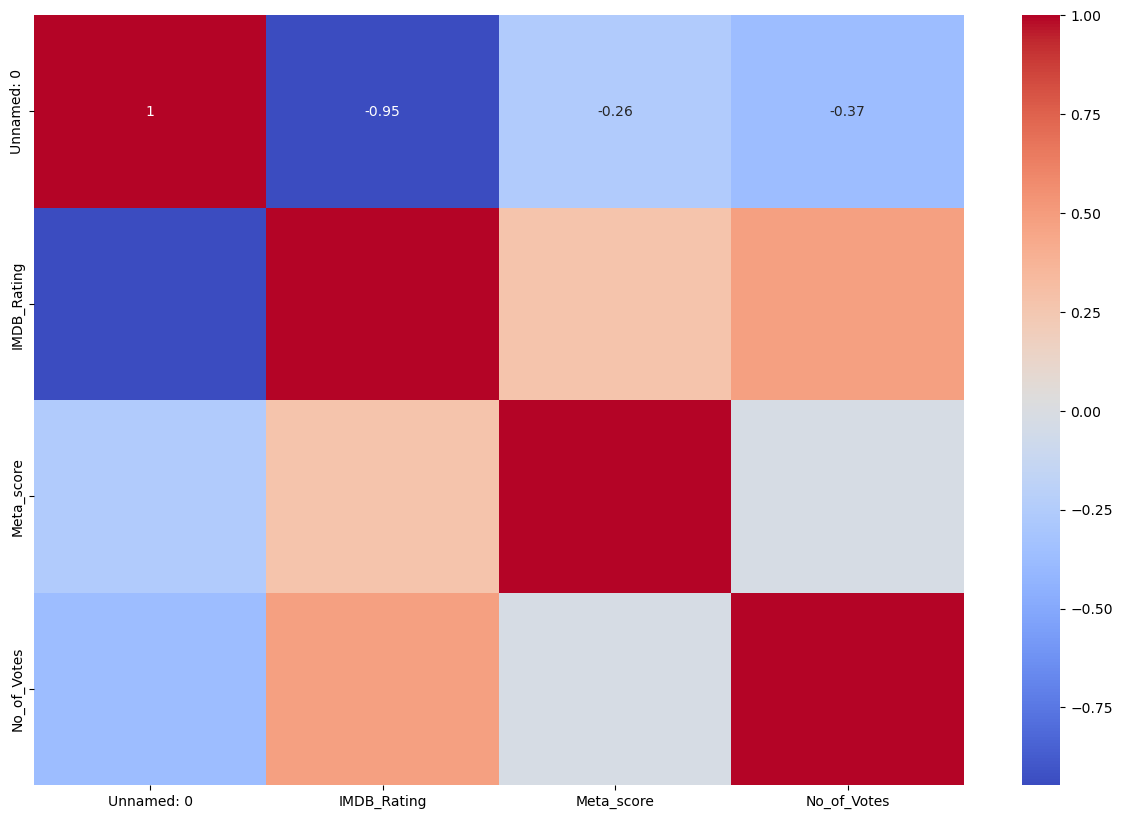

In [91]:
numeric_data = data.select_dtypes(include=[float, int])

# matriz de correlação
correlation_matrix = numeric_data.corr()

# heatmap de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

##### O código abaixo retorna um gráfico onde é possível se mapear a média de nota IMDB que cada gênero de filme recebe, nesse caso, conforme essa availiação, filmes que contém em seus roteiros Ação e Ficção Científica e filmes que contem Ação, Aventura e Drama, são os filmes, por Gênero que recebem as melhores notas de IMDB, no caso em estudo. Esses gêneros recebem entre 8.5 a 8.6 de nota IMDB.

### Dê um duplo clique na figura para visualizar os dados em um zoom maior

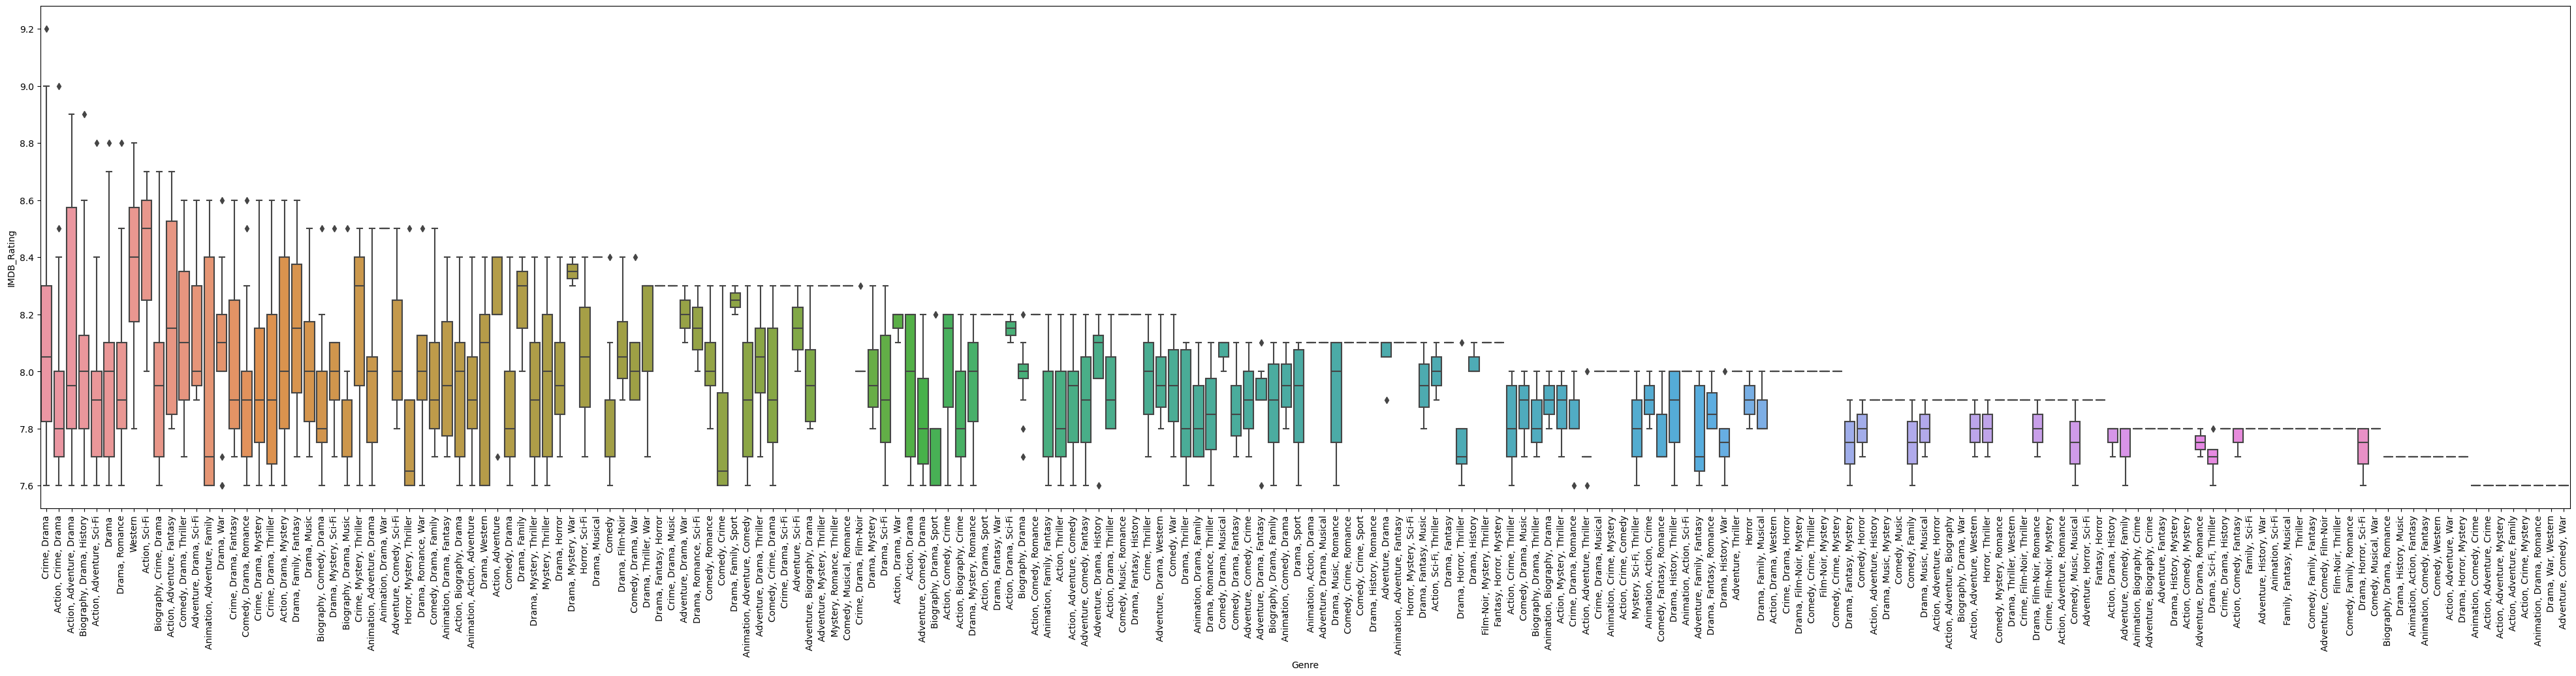

In [92]:
# boxplot para gênero e nota do IMDB
plt.figure(figsize=(50, 10))
sns.boxplot(x='Genre', y='IMDB_Rating', data=data)
plt.xticks(rotation=90)
plt.show()

In [93]:
# a. recomendação de filme com base na média ponderada da nota do IMDB
data['IMDB_Rating'] = (data['Meta_score'] * data['No_of_Votes']) / (data['No_of_Votes'] + 1)
recommended_movie = data.loc[data['IMDB_Rating'].idxmax()]
print(f"Recomendação de filme: {recommended_movie['Series_Title']}")

Recomendação de filme: The Godfather


##### De acordo com a execução do código acima, é possível recomendar à uma pessoa que eu não conheça, a patir dos dados em estudo, que o filme "The Godfather", seria uma boa recomendação. 

In [94]:
# b. análise de correlação para identificar principais fatores
correlation_with_revenue = correlation_matrix['Meta_score'].sort_values(ascending=False)
print(correlation_with_revenue)

Meta_score     1.000000
IMDB_Rating    0.271374
No_of_Votes   -0.020091
Unnamed: 0    -0.262064
Name: Meta_score, dtype: float64


##### A partir da saída do código acima, é possível concluir que com o melhor valor de correlação = 1 (representando alta correlação entre os dados), a variável "Meta_score" representa o principal fator que está relacionado com a alta expectativa de faturamento de um filme, ou seja, quanto maior for a média ponderada de todas as críticas que um filme recebe maior será o faturamento com as vendas, pois mais pessoas irão assistir ou serão recomendadas à assistir.

In [95]:
!pip install nltk

In [96]:
!pip install stopwords

## Insights importantes que podem ser visualizados a partir da análise da coluna 'Overview'

In [97]:
# c' alguns insights a partir da análise da coluna 'Overview' presente no banco de dados em estudo

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')

# aconselhável carregar novamente os dados.csv para evitar erros de execução
file_path = 'C:/Indicium/imdb.csv'
data = pd.read_csv(file_path)

# verificando se as colunas 'Overview' e 'Genre' existem no arquivo csv fornecido
if 'Overview' in data.columns and 'Genre' in data.columns:
    
    # limpeza e pré-processamento do texto
    def preprocess_text(text):
        # remover pontuações
        text = text.translate(str.maketrans('', '', string.punctuation))
        # remover números
        text = re.sub(r'\d+', '', text)
        # converter para minúsculas
        text = text.lower()
        # remover stopwords
        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in text.split() if word not in stop_words)
        return text

    # aplicando a função de pré-processamento à coluna 'Overview'
    data['cleaned_overview'] = data['Overview'].apply(preprocess_text)

    # verificando os valores únicos na coluna 'Genre'
    print(data['Genre'].unique())

    # removendo linhas com valores nulos nas colunas 'cleaned_overview' e 'Genre' (para evitar erros de execução)
    data = data.dropna(subset=['cleaned_overview', 'Genre'])

    # dividir os dados em treino e teste (é aconselhável 25% dos dados para teste ou treinamento)
    X_train, X_test, y_train, y_test = train_test_split(data['cleaned_overview'], data['Genre'], test_size=0.25, random_state=50)

    # transformar o texto em vetores numéricos usando TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # treinando o modelo de classificação
    classifier = RandomForestClassifier(random_state=50)
    classifier.fit(X_train_tfidf, y_train)

    # fazendo as previsões
    y_pred = classifier.predict(X_test_tfidf)

    # avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred, zero_division=0))

    # analisando as palavras mais importantes (50+)
    feature_names = vectorizer.get_feature_names_out()
    importance = classifier.feature_importances_
    importance_df = pd.DataFrame({'word': feature_names, 'importance': importance})
    importance_df = importance_df.sort_values(by='importance', ascending=False)

    print("Palavras mais importantes para a classificação de gêneros:")
    print(importance_df.head(50))

else:
    print("As colunas 'Overview' ou 'Genre' não existem no DataFrame.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pehdr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Crime, Drama' 'Action, Crime, Drama' 'Action, Adventure, Drama'
 'Biography, Drama, History' 'Action, Adventure, Sci-Fi' 'Drama'
 'Drama, Romance' 'Western' 'Action, Sci-Fi' 'Biography, Crime, Drama'
 'Action, Adventure, Fantasy' 'Comedy, Drama, Thriller'
 'Adventure, Drama, Sci-Fi' 'Animation, Adventure, Family' 'Drama, War'
 'Crime, Drama, Fantasy' 'Comedy, Drama, Romance' 'Crime, Drama, Mystery'
 'Crime, Drama, Thriller' 'Action, Drama, Mystery'
 'Drama, Family, Fantasy' 'Drama, Music' 'Biography, Comedy, Drama'
 'Drama, Mystery, Sci-Fi' 'Biography, Drama, Music'
 'Crime, Mystery, Thriller' 'Animation, Adventure, Drama'
 'Animation, Drama, War' 'Adventure, Comedy, Sci-Fi'
 'Horror, Mystery, Thriller' 'Drama, Romance, War' 'Comedy, Drama, Family'
 'Animation, Drama, Fantasy' 'Action, Biography, Drama'
 'Animation, Action, Adventure' 'Drama, Western' 'Action, Adventure'
 'Comedy, Drama' 'Drama, Family' 'Drama, Mystery, Thriller'
 'Mystery, Thriller' 'Drama, Horror' 'Drama, Mystery, 

##### A partir da saída de execução do código acima é possível observar que o modelo foi bem treinado, tendo uma acurácia de 0,10. Conforme dataframe apresentado, as palavras "young", "life", e "murder" são as de mais importância, ou seja, filmes de gêneros provavelmente de Drama, Ação e Aventura, são os que podem trazer maiores valores de faturamento com as vendas. O gênero é um dado importante a se atentar para a escolha dos melhores investimentos a serem realizados.

## Nota do IMDB a partir dos dados em análise

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import re

# Baixar o recurso de stopwords
nltk.download('stopwords')

# Carregar os dados
file_path = 'C:/Indicium/imdb.csv'
data = pd.read_csv(file_path)


# Selecionar as variáveis relevantes
features = ['Meta_score', 'Genre', 'No_of_Votes', 'Gross', 'Released_Year', 'Overview']
target = 'IMDB_Rating'


# Limpeza e pré-processamento do texto
def preprocess_text(text):
    # Remover pontuações
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remover números
    text = re.sub(r'\d+', '', text)
    # Converter para minúsculas
    text = text.lower()
    # Remover stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Aplicar a função de pré-processamento à coluna 'Overview'
data['cleaned_overview'] = data['Overview'].apply(preprocess_text)

# Codificação das variáveis categóricas
encoders = {}
for col in ['Meta_score', 'Genre', 'No_of_Votes', 'Gross', 'Released_Year', 'Overview']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder

# Extração de características da data de lançamento
data['Released_Year'] = pd.to_datetime(data['Released_Year']).dt.year

# Vetorização do texto
vectorizer = TfidfVectorizer(max_features=5000)
overview_tfidf = vectorizer.fit_transform(data['cleaned_overview']).toarray()

# Combinação das características
X = np.concatenate([data[['Meta_score', 'Genre', 'No_of_Votes', 'Gross', 'Released_Year', 'Overview']].values, overview_tfidf], axis=1)
y = data[target].values

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Treinar o modelo
model = RandomForestRegressor(random_state=50)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pehdr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mean Absolute Error: 0.16179200000000002


## A partir da execução do código acima é possível se obter as seguintes análises: 

## Tipo de Problema
##### Estamos resolvendo um problema de regressão, pois a variável alvo (nota do IMDB) é contínua.

## Variáveis Utilizadas e Transformações
##### Foram utilizadas as seguintes variáveis:

##### Meta_score: variável contínua.
##### Genre: essa variável pode ser codificada utilizando-se técnicas como One-Hot Encoding.
##### Director: essa variável pode ser codificada utilizando-se técnicas como Label Encoding ou One-Hot Encoding.
##### Runtime: variável contínua.
##### Released_Year: variável que pode ser transformada em características como ano, mês, dia da semana, etc.
##### Overview: Texto que pode ser transformado em variáveis numéricas usando técnicas de Processamento de Linguagem Natural (NPL) como TF-IDF ou embeddings.

## Modelo escolhido
##### Random Forest Regressor. Este modelo é adequado porque:
##### - Lida bem com variáveis categóricas após codificação.
##### - É robusto contra overfitting's em comparação com árvores de decisão individuais, por exemplo.
##### - Pode capturar interações complexas entre as variáveis.

### Prós do modelo utilizado:
##### - Não requer muita pré-processamento de dados.
##### - Funciona bem com dados não linearmente separáveis.
##### - Fornece uma estimativa de importância das características.

### Contras do modelo utilizado:
##### - Pode ser computacionalmente intensivo e lento para grandes datasets.
##### - Difícil de interpretar em comparação com modelos lineares.
##### - Medida de Performance


### Utilizado o Mean Absolute Error (MAE), pois é intuitivo e mede diretamente a magnitude média dos erros em termos da mesma unidade da variável alvo (nota do IMDB).

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# carregar o conjunto de dados
file_path = 'C:/Indicium/imdb.csv'
data = pd.read_csv(file_path)

# remover colunas irrelevantes
data = data.drop(columns=['Unnamed: 0'])

# tratar valores ausentes
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)
data['Gross'].fillna(data['Gross'].mean(), inplace=True)

# identificar e remover linhas onde a variável Released_Year não é numérica.
data = data[pd.to_numeric(data['Released_Year'], errors='coerce').notnull()]
data['Released_Year'] = data['Released_Year'].astype(int)

# separar variáveis independentes (X) e variável dependente (y)
X = data.drop(columns=['IMDB_Rating'])
y = data['IMDB_Rating']

# pré-processamento para colunas numéricas e categóricas
numeric_features = ['Released_Year', 'Meta_score', 'No_of_Votes', 'Gross']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['Certificate', 'Genre']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# vetorização dos dados de 'Overview'
text_features = 'Overview'
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000))])

# combinando preprocessadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('txt', text_transformer, text_features)])

# dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# criar e treinar o modelo de regressão
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

# realizando as previsões no conjunto de teste
y_pred = model.predict(X_test)

# avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# função que realiza a previsão da nota do IMDB, com base nos dados fornecidos como filme exemplo no case
def predict_imdb_rating(new_movie):
    new_movie_df = pd.DataFrame([new_movie])
    prediction = model.predict(new_movie_df)
    return prediction[0]

# criando exemplo de uso
new_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28341469'
}

print(f"Predicted IMDB Rating: {predict_imdb_rating(new_movie)}")

Mean Squared Error: 0.05691582126706288
Predicted IMDB Rating: 9.310792941326778


#### A partir do valor dentro do que pode ser aceitável para MSE em análises preditivas, o modelo apresentou uma boa performance de 0.057
#### Com isso, a nota do IMDB ('IMDB_Rating') para o filme em exemplo solicitado, seria 9.31.

In [100]:
# salvando o modelo desenvolvido em formato.pkl
import joblib
joblib.dump(model, 'LH_CD_PEDROHENRIQUEVALENTIMCEZAR.pkl')

['LH_CD_PEDROHENRIQUEVALENTIMCEZAR.pkl']

In [101]:
# criação do arquivo.txt contendo os requisitos com todas as dependências do projeto
import subprocess
subprocess.run(['pip', 'freeze'], stdout=open('requirements.txt', 'w'))

CompletedProcess(args=['pip', 'freeze'], returncode=0)